### Spanning tree (Остовные деревья)

- https://ru.wikipedia.org/wiki/%D0%9E%D1%81%D1%82%D0%BE%D0%B2%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE

- https://en.wikipedia.org/wiki/Spanning_tree

**Остовное дерево** графа состоит из минимального подмножества рёбер графа, таких, что из одной из вершин графа можно попасть в любую другую вершину, двигаясь по этим рёбрам. Я бы назвал такой граф `упрощенным`, поскольку он не теряет информацию о досягаемости между вершинами, но теряет информацию о кратчайшем пути.\
**Остовное дерево** — ациклический связный подграф данного связного неориентированного графа, в который входят все его вершины.


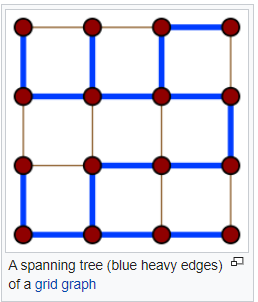

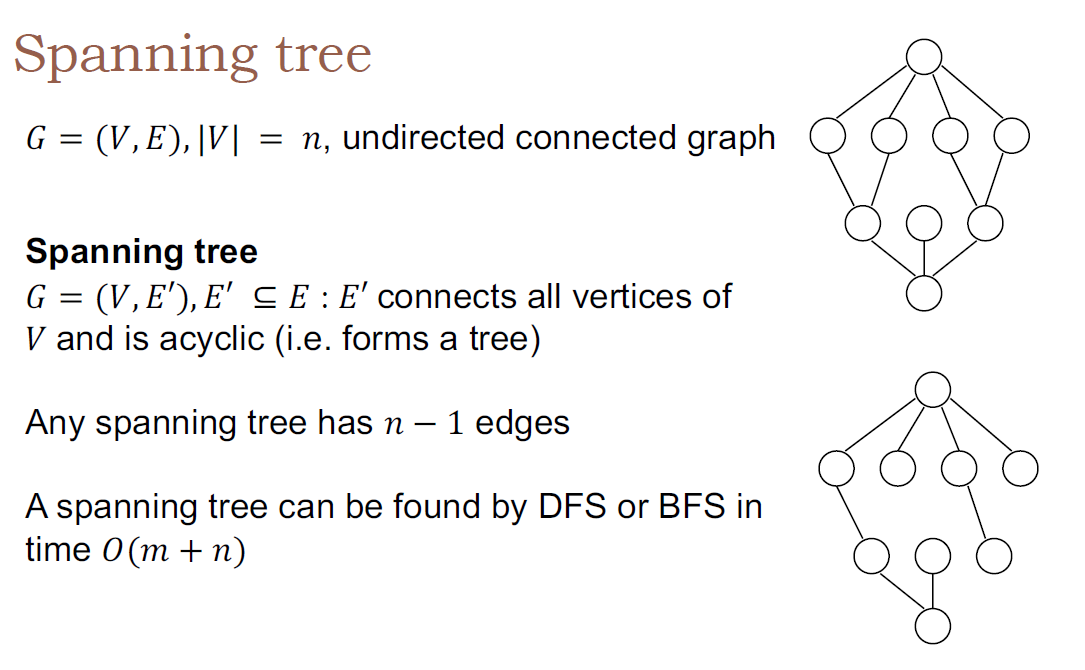

Еще одна картинка
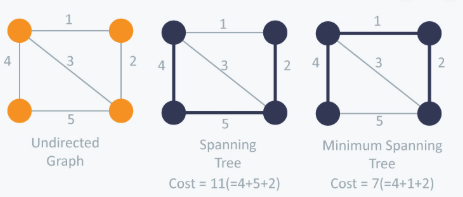

### применение
Several pathfinding algorithms, including Dijkstra's algorithm and the A* search algorithm, internally build a spanning tree as an intermediate step in solving the problem.

In order to minimize the cost of power networks, wiring connections, piping, automatic speech recognition, etc., people often use algorithms that gradually build a spanning tree (or many such trees) as intermediate steps in the process of finding the minimum spanning tree.[1]

The Internet and many other telecommunications networks have transmission links that connect nodes together in a mesh topology that includes some loops. In order to "avoid bridge loops and "routing loops", many routing protocols designed for such networks—including the Spanning Tree Protocol, Open Shortest Path First, Link-state routing protocol, Augmented tree-based routing, etc.—require each router to remember a spanning tree.

Например есть потребители воды в городах. На начальном графе, ребро представляет из себя дорогу и копать трубы мы можем только под ними. Таким образом октовные деревья смогут нам ответить, где копать, чтобы охватить все города

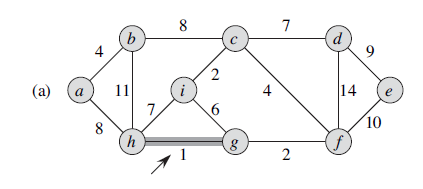

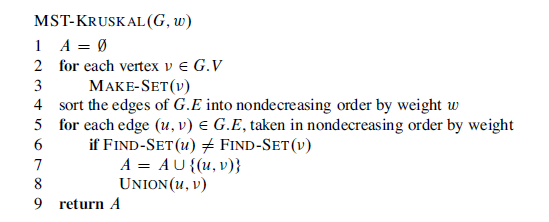

### вводим понятия parents, rank
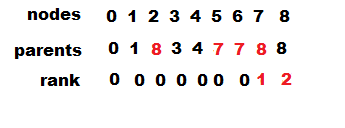

In [6]:
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
  
    def __init__(self,vertices): 
        self.V = vertices #No. of vertices 
        self.graph = []

    def add_edge(self,u,v,w): 
        self.graph.append([u,v,w]) 
        
    # ищю предка ноды. Если предка нет, то нода сама себе предок
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 
  
    # спариваю ноды. Link тоже здесь делается
    def union(self, parent, rank, x, y): 
        xroot = x
        yroot = y
        # Attach smaller rank tree under root of  
        # high rank tree (Union by Rank) 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
  
        # If ranks are same, then make one as root  
        # and increment its rank by one 
        else: 
            parent[yroot] = xroot 
            rank[xroot] += 1
  
    # The main function to construct MST using Kruskal's algorithm 
    def KruskalMST(self): 

        result = [] #This will store the resultant MST 

        parents = [] ; rank = [] 
        # Create V subsets with single elements 
        for node in range(self.V):  # размещаю все ноды в лист
            parents.append(node) 
            rank.append(0) 
        
        # into nondecreasing order by weight
        self.graph =  sorted(self.graph, key=lambda item: item[2]) 
        print("graph")
        for kk in self.graph:
            print(kk)
            
        for u,v,w in self.graph: #taken in nondecreasing order by weight
            x = self.find(parents, u) 
            y = self.find(parents, v) 
            
            # если ноды не спарены, то спарить их
            if x != y: 
                result.append([u,v,w]) 
                self.union(parents, rank, x, y)             
            # Else discard the edge 
  
        print ("Following are the edges in the constructed MST")
        for u,v,weight  in result: 
            print (f"{u} -- {v} == {weight}") 
        
        print(f"ranks", rank)
            
# Driver code 
G = Graph(9) 
G.add_edge(0, 1, 4)
G.add_edge(0, 7, 8)
G.add_edge(1, 7, 11)
G.add_edge(1, 2, 8)
G.add_edge(7, 8, 8)
G.add_edge(7, 6, 1)
G.add_edge(8, 6, 6)
G.add_edge(8, 2, 2)
G.add_edge(6, 5, 2)
G.add_edge(2, 5, 4)
G.add_edge(2, 3, 7)
G.add_edge(3, 5, 14)
G.add_edge(5, 4, 10)
G.add_edge(3, 4, 9)

G.KruskalMST()
[8, 6, 6]

graph
[7, 6, 1]
[8, 2, 2]
[6, 5, 2]
[0, 1, 4]
[2, 5, 4]
[8, 6, 6]
[2, 3, 7]
[0, 7, 8]
[1, 2, 8]
[7, 8, 8]
[3, 4, 9]
[5, 4, 10]
[1, 7, 11]
[3, 5, 14]
Following are the edges in the constructed MST
7 -- 6 == 1
8 -- 2 == 2
6 -- 5 == 2
0 -- 1 == 4
2 -- 5 == 4
2 -- 3 == 7
0 -- 7 == 8
3 -- 4 == 9
ranks [1, 0, 0, 0, 0, 0, 0, 1, 2]


[8, 6, 6]

## Complexity, сложность

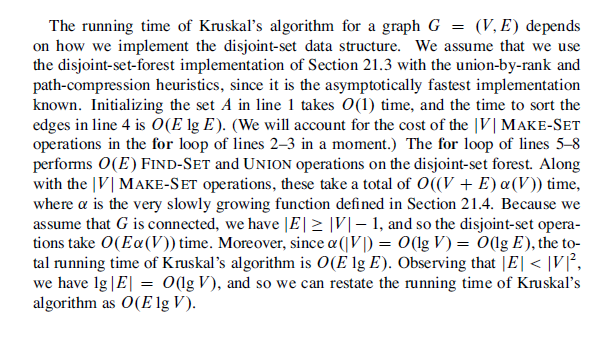

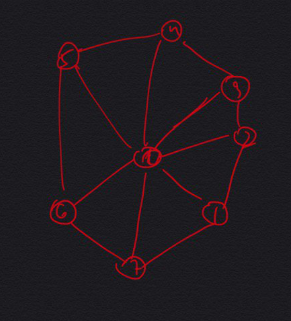

In [7]:
# Исследую ранк у графа  на рисунке выше
G = Graph(9)

for i in range(1,9):
    G.add_edge(0, i, 1)
    
for i in range(1,8):
    G.add_edge(i, i + 1, 1)

G.KruskalMST()

graph
[0, 1, 1]
[0, 2, 1]
[0, 3, 1]
[0, 4, 1]
[0, 5, 1]
[0, 6, 1]
[0, 7, 1]
[0, 8, 1]
[1, 2, 1]
[2, 3, 1]
[3, 4, 1]
[4, 5, 1]
[5, 6, 1]
[6, 7, 1]
[7, 8, 1]
Following are the edges in the constructed MST
0 -- 1 == 1
0 -- 2 == 1
0 -- 3 == 1
0 -- 4 == 1
0 -- 5 == 1
0 -- 6 == 1
0 -- 7 == 1
0 -- 8 == 1
ranks [1, 0, 0, 0, 0, 0, 0, 0, 0]


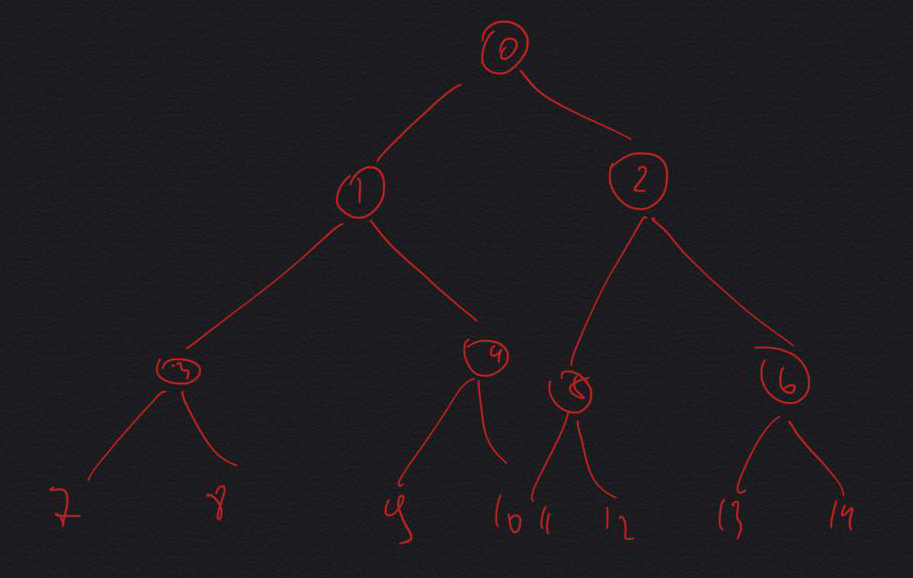

In [11]:
# Driver code 
G = Graph(17)


G.add_edge(0, 1, 1)
G.add_edge(0, 2, 1)

G.add_edge(1, 3, 1)
G.add_edge(1, 4, 1)

G.add_edge(2, 5, 1)
G.add_edge(2, 6, 1)

G.add_edge(3, 7, 1)
G.add_edge(3, 8, 1)

G.add_edge(4, 9, 1)
G.add_edge(4, 10, 1)

G.add_edge(5, 11, 1)
G.add_edge(5, 12, 1)

G.add_edge(6, 13, 1)
G.add_edge(6, 14, 1)
    
G.add_edge(3, 15, 1)
G.add_edge(3, 16, 1)
    

G.KruskalMST()

graph
[0, 1, 1]
[0, 2, 1]
[1, 3, 1]
[1, 4, 1]
[2, 5, 1]
[2, 6, 1]
[3, 7, 1]
[3, 8, 1]
[4, 9, 1]
[4, 10, 1]
[5, 11, 1]
[5, 12, 1]
[6, 13, 1]
[6, 14, 1]
[3, 15, 1]
[3, 16, 1]
Following are the edges in the constructed MST
0 -- 1 == 1
0 -- 2 == 1
1 -- 3 == 1
1 -- 4 == 1
2 -- 5 == 1
2 -- 6 == 1
3 -- 7 == 1
3 -- 8 == 1
4 -- 9 == 1
4 -- 10 == 1
5 -- 11 == 1
5 -- 12 == 1
6 -- 13 == 1
6 -- 14 == 1
3 -- 15 == 1
3 -- 16 == 1
ranks [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
# Driver code 
G = Graph(20)


G.add_edge(0, 1, 1)
G.add_edge(0, 2, 1)
G.add_edge(0, 3, 1)



G.add_edge(3, 5, 1)
G.add_edge(3, 4, 1)

G.add_edge(0, 6, 1)
G.add_edge(6, 7, 1)
G.add_edge(6, 8, 1)
G.add_edge(8, 9, 1)
G.add_edge(2, 10, 1)


G.KruskalMST()

graph
[0, 1, 1]
[0, 2, 1]
[0, 3, 1]
[3, 5, 1]
[3, 4, 1]
[0, 6, 1]
[6, 7, 1]
[6, 8, 1]
[8, 9, 1]
[2, 10, 1]
Following are the edges in the constructed MST
0 -- 1 == 1
0 -- 2 == 1
0 -- 3 == 1
3 -- 5 == 1
3 -- 4 == 1
0 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
2 -- 10 == 1
ranks [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
